In [374]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

sns.set_style('whitegrid')

# The following line is needed to show plots inline in notebooks
%matplotlib inline 

In [375]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

## Data cleaning

While the data is made ready for analysis, several values are missing, and some features are categorical. Note that some values that appear "null" indicate that a survey respondent did not select that given option from a multiple-choice list. For example - "Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers)"

For the data cleaning step, handle missing values however you see fit and justify your approach. Provide some insight on why you think the values are missing and how your approach might impact the overall analysis. Suggestions include filling the missing values with a certain value (e.g. mode for categorical data) and completely removing the features with missing values. Secondly, convert categorical data into numerical data by encoding and explain why you used this particular encoding method.

These tasks can be done interchangeably, e.g., encoding can be done first.

### Understanding data and checking missing values

In [376]:
#df=pd.read_csv(r"C:\Users\qg010\Google Drive\MIE 1624\Assignment1\Kaggle_Salary.csv")
df=pd.read_csv("Kaggle_Salary.csv")
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1,6,"60,000-69,999"


In [377]:
#pd.set_option('display.max_columns', 10)

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Columns: 248 entries, Time from Start to Finish (seconds) to Q10_buckets
dtypes: int64(30), object(218)
memory usage: 23.6+ MB


In [379]:
df.describe()

,Time from Start to Finish (seconds),Q2_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,...,Q26_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q10_Encoded
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,...,12497.000000,12497.00000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,14186.510202,-0.963191,29.216932,-0.250940,8.103465,20.657998,25.922621,4.303833,3.934304,262.422101,...,-0.959030,-0.96015,0.146995,-0.432104,-0.024486,-0.075458,-0.396975,-0.762663,0.084420,3.920061
std,72866.379285,0.978525,122.208237,8.257127,51.449272,101.726742,119.957741,33.044706,31.519867,615.567766,...,0.969486,0.93225,10.517404,6.495225,9.436367,9.187520,6.270585,3.395293,9.675712,4.188416
min,67.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,448.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,636.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000
75%,1054.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,56.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.000000
max,843612.000000,39.000000,877.000000,137.000000,491.000000,812.000000,935.000000,366.000000,337.000000,2840.000000,...,35.000000,31.00000,162.000000,113.000000,143.000000,142.000000,108.000000,74.000000,144.000000,14.000000


Explore missing data associated with its counts and percentage.

In [380]:
df.filter(regex='Part').isna().sum();

Drop columns with high percentage (>40%) NaN values because those columns does not have enough useful information for model to learn from. 

In [381]:
pd.options.display.max_rows = 300
df.isna().mean().round(4) * 100
#alter=df.isna().sum()/len(df)*100
#alter.round(2)

Time from Start to Finish (seconds)     0.00
Q1                                      0.00
Q2                                      0.00
Q2_OTHER_TEXT                           0.00
Q3                                      0.00
Q4                                      0.00
Q5                                      0.00
Q5_OTHER_TEXT                           0.00
Q6                                      0.00
Q7                                      0.00
Q8                                      0.00
Q9_Part_1                              52.16
Q9_Part_2                              71.94
Q9_Part_3                              60.87
Q9_Part_4                              73.71
Q9_Part_5                              70.92
Q9_Part_6                              81.57
Q9_Part_7                              95.88
Q9_Part_8                              98.09
Q9_OTHER_TEXT                           0.00
Q10                                     0.00
Q11                                     1.98
Q12_Part_1

### Handling missing values

There are mainly two types of questions being asked in the survey. One is multiple choice question where surveyors can submit one of options and leave the rest blank. The other one is single choice question where the answers will be record once surveyors select one choice for that particular question. 

The survey consists lots of choices for multiple choice questions, and each choice of one question is separated into individual column in the dataset. As a result, choosing one answer will stop people from choosing any other answers. In another words, the Nan values in these multiple choice questions are not actual missing values. They are appearing to be missing simply because surveyor did not choose that particular option in that specific questions only. So dropping all Nan values is not appropriate. Instead, 0 will be assigned if respondents did not choose this particular choice, and 1 will be assigned if people surveyed have picked this choice. 

Multiple choices questions will be dealt based on the method mentioned above as following.  

In [382]:
df_choice = df.filter(regex='Part')
df_choice.head()

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q12_Part_1,Q12_Part_2,...,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter (data science influencers),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN


In [383]:
choice = [col for col in df.columns if 'Part' in col]
choice;

In [384]:
#d[d.apply(type)==str]

In [385]:
#df['Q18_Part_1'].replace(df['Q18_Part_1'].value_counts().index.to_list()[0],1)

In [386]:
for i in range(len(choice)):
    if df[choice[i]].isna().sum()!=0:
        replace={df[choice[i]].value_counts().index.to_list()[0]:1}
        df[choice[i]]=df[choice].iloc[:,i].replace(replace)

In [387]:
###Alternative
df[choice]=df[choice].fillna(0)

Check if 

In [388]:
df[choice].head()

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q12_Part_1,Q12_Part_2,...,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [389]:
df.loc[:,df.isna().mean()!=0].dtypes
#df[choice].iloc[:,0].value_counts().index.values[0]
df.isna().sum()
df.isna().mean().value_counts();

For columns like "Q11 Q14 Q15 Q19 Q22 Q23", they are categorical data with missing values less than 20%. That means that it's reasonable enough to use mode to fill missing data. These questions only have a limited amount of missing date probably because surveyor did not want to answer those questions for privacy reason or simply because they forgot or missed those questions.  

In [390]:
cols=df.loc[:,df.isna().mean()!=0].columns
for col in cols:
    df[col].fillna(df[col].mode()[0],inplace=True)
    #print('After filling NaN value, the NaN value rows in {} column is'.format(col),df[df[col].isnull()])

In [391]:
df.isna().sum().sum()

0

There is no missing values at this point! Categorical data will be converted into numerical after EDA. 

In [392]:
#Look at the number of missing data using a heatmap
#fig, ax = plt.subplots(figsize=(12,8))
#sns.heatmap(df_c, cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

## Exploratory data analysis

a. Present 3 graphical figures that represent trends in the data. How could these trends be used to help with the task of predicting yearly compensation or understanding the data? All graphs should be readable and presented in the notebook. All axes must be appropriately labeled.

b. Visualize the order of feature importance. Some possible methods include correlation plot, or a similar method. Given the data, which of the original attributes in the data are most related to a survey respondent's yearly compensation?

### Look for trends with the relation between different features and compensation by showing several graphs below. 

Text(0, 0.5, 'Frequency')

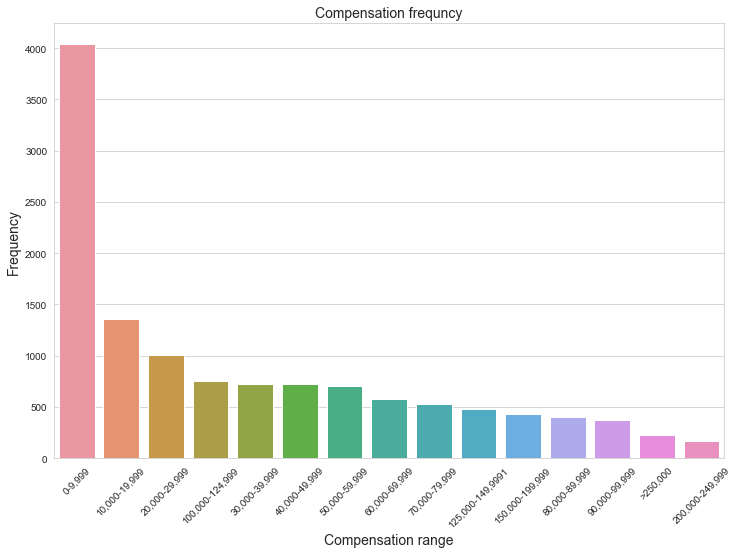

In [393]:
plt.figure(figsize=(12,8))
#sns.distplot(df['Q10_buckets'], hist = False, kde = True, label='Americas')
sns.barplot(df['Q10_buckets'].value_counts().index,df['Q10_buckets'].value_counts())
# Plot formatting
#plt.legend(prop={'size': 12})
plt.title('Compensation frequncy',fontsize=14)
plt.xlabel('Compensation range',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Frequency',fontsize=14)  

As shown clearly from the figure above, the most frequent compensation range is below $1000. Whereas high compensation is relatively rare in reality. 

In order to further explore data with better visualization, 'Q10_buckets' will be replaced with the mean value of the range interval.

In [394]:
sal_range={'0-9,999':5000,
           '10,000-19,999':15000,
           '20,000-29,999':25000,
           '100,000-124,999':125000,
           '30,000-39,999':35000,
           '40,000-49,999':45000,
           '50,000-59,999':55000,
           '60,000-69,999':65000,
           '70,000-79,999':75000,
           '125,000-149,9991':137500,
           '150,000-199,999':175000,
           '80,000-89,999':85000,
           '90,000-99,999':95000,
           '200,000-249,999':225000,
           '>250,000':275000
}

In [395]:
df['Q10_buckets'].replace(sal_range,inplace=True)

From the figure below, obviously, there are certain number of countries enjoying high compensation than the rest. 

Text(0, 0.5, 'Mean Compensation')

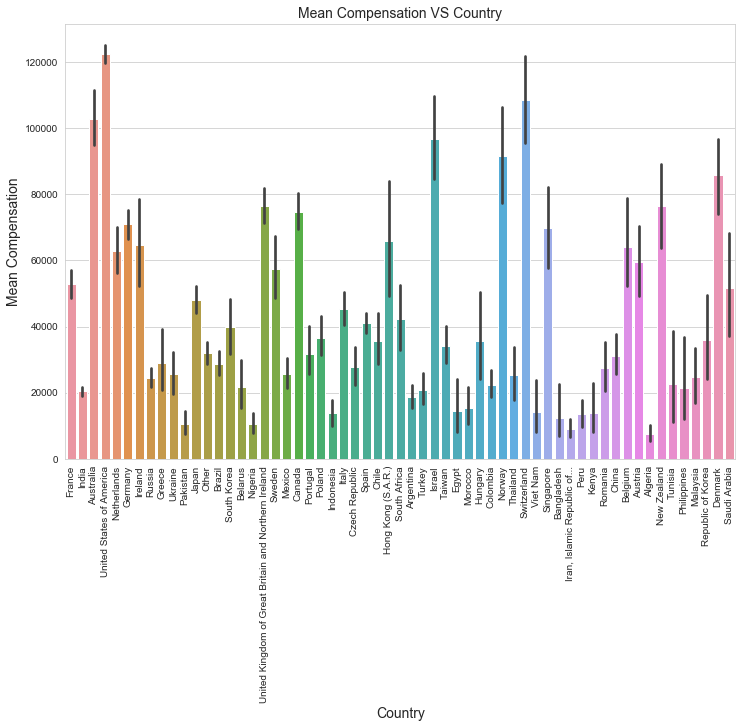

In [396]:
plt.figure(figsize=(12,8))
sns.barplot(x='Q3',y='Q10_buckets',data=df)
# Plot formatting
#plt.legend(prop={'size': 12})
plt.title('Mean Compensation VS Country',fontsize=14)
plt.xlabel('Country',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Mean Compensation',fontsize=14)  

In [397]:
comp_age=df.groupby('Q1')['Q10_buckets'].mean()

Text(0, 0.5, 'Mean Compensation')

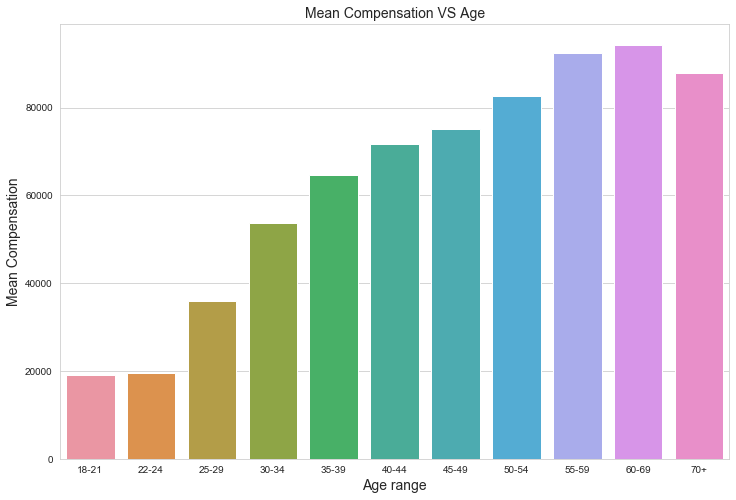

In [398]:
plt.figure(figsize=(12,8))
#sns.distplot(df['Q10_buckets'], hist = False, kde = True, label='Americas')
sns.barplot(comp_age.index,comp_age)
#sns.barplot(x='Q1',y='Q10_buckets',hue='Q2',data=df,dodge=False)
# Plot formatting
#plt.legend(prop={'size': 12})
plt.title('Mean Compensation VS Age',fontsize=14)
plt.xlabel('Age range',fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Mean Compensation',fontsize=14)  

From the bar plot above, it shows clearly the evidence that the older people are, the more compensation they can earn. 

Text(0, 0.5, 'Compensation')

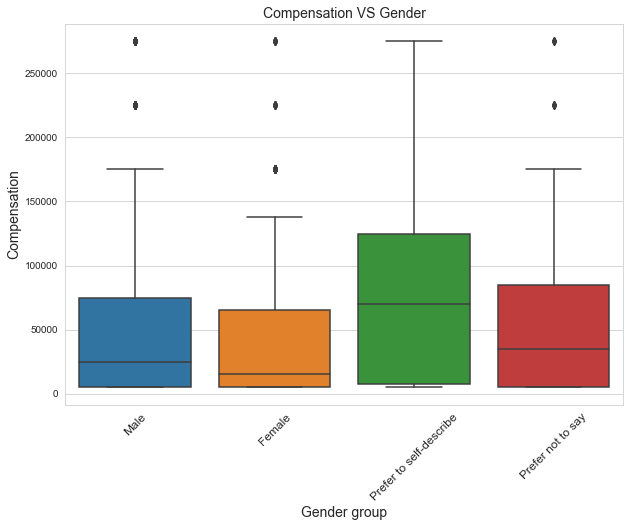

In [399]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Q2", y="Q10_buckets", data=df)
# Plot formatting
#plt.legend(prop={'size': 12})
plt.title('Compensation VS Gender',fontsize=14)
plt.xlabel('Gender group',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.ylabel('Compensation',fontsize=14)  

As for the graph above, the difference between male and female is not remarkably significant here, which means it would contribute only certain amount of effect to the prediction of compensation. As for the other two categories, they are way less in terms of the number of samples, which can be omitted especially the variances of these two groups are too high to be generalized. 

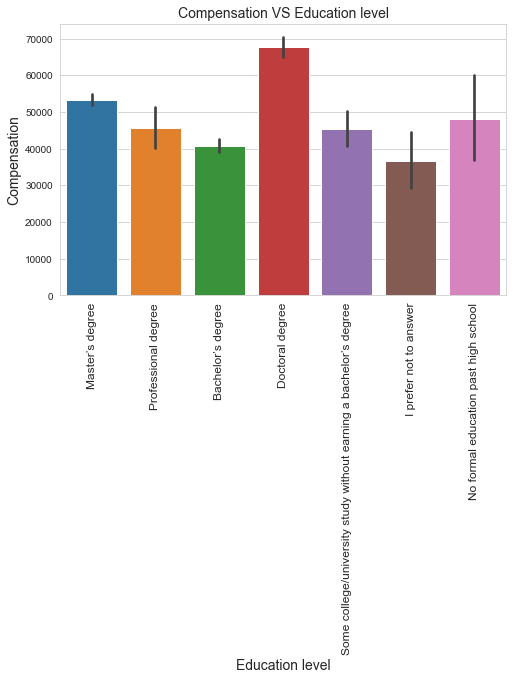

In [400]:
plt.figure(figsize=(8,5))
#sns.stripplot(x="Q4", y="Q10_buckets", data=df, jitter=False)
sns.barplot(x="Q4", y="Q10_buckets", data=df)
# Plot formatting
#plt.legend(prop={'size': 12})
plt.title('Compensation VS Education level',fontsize=14)
plt.xlabel('Education level',fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Compensation',fontsize=14) 
plt.savefig('edu.png')

From the graph above, PHD has higher potential to earn more money. The other degrees don't show significant difference in this case. 

### Visualize the order of feature importance

In order to compute feature importance or correlation, all the categorical needs to be converted into numerical values as well. 

#### Convert categorical data

In [401]:
df_c=df.select_dtypes(exclude=['number'])
df_c;

For columns like 'Q2','Q5','Q8','Q14','Q19', they are nominal category columns without ordering. As a result, they will be transformed through one hot encoding with pandas and concatenate with original dataframe. 

In [402]:
dm_col=['Q2','Q5','Q8','Q14','Q19']

In [403]:
for col in dm_col:
    Q_d=pd.get_dummies(df[col],prefix=col,drop_first=True)
    df=pd.concat([df,Q_d],axis=1)
    df.drop(columns=[col],axis=1,inplace=True)

In [404]:
age={'25-29':27,
     '30-34':32,
     '35-39':37,
     '22-24':23,
     '40-44':42,
     '45-49':47,
     '50-54':52,
     '18-21':20,
     '55-59':57,
     '60-69':65,
     '70+':80
}

In [405]:
degree={
    'I prefer not to answer':0,
    'No formal education past high school':1,
    'Some college/university study without earning a bachelor’s degree':2,
    'Professional degree':3,
    'Bachelor’s degree':4,
    'Master’s degree':5,
    'Doctoral degree':6
}

In [406]:
employee={
    '0-49 employees':25,
    '> 10,000 employees':15000,
    '1000-9,999 employees':5500,
    '50-249 employees':150,
    '250-999 employees':625
}

In [407]:
ind={
    '20+':25,
    '1-2':2,
    '3-4':4,
    '0':0,
    '5-9':7,
    '10-14':12,
    '15-19':17
}

In [408]:
compensatin={
    '$0-999':500,
    '10,000-14,999':12500,
    '100,000-124,999':112500,
    '30,000-39,999':35000,
    '40,000-49,999':45000,
    '50,000-59,999':55000,
    '1,000-1,999':1500,
    '60,000-69,999':65000,           
    '5,000-7,499':6250,              
    '15,000-19,999':17500,        
    '20,000-24,999':22500,                 
    '70,000-79,999':75000,       
    '125,000-149,999':137500,             
    '25,000-29,999':27500,               
    '150,000-199,999':175000,             
    '7,500-9,999':8750,              
    '80,000-89,999':85000,             
    '2,000-2,999':2500,                
    '90,000-99,999':95000,              
    '3,000-3,999':3500,                
    '4,000-4,999':4500,    
    '200,000-249,999':225000,   
    '> $500,000': 600000,     
    '300,000-500,000':400000,    
    '250,000-299,999':275000    
}

In [409]:
spend={
    '$0 (USD)':0,  
    '$100-$999': 550,         
    '$1000-$9,999':5500,        
    '$1-$99':50,               
    '$10,000-$99,999':55000,      
    '> $100,000 ($USD)':150000    
}

In [410]:
time={
    '3-5 years':4,
    '1-2 years':2,
    '< 1 years':0.5,
    '5-10 years':8,
    '10-20 years':15,
    'I have never written code':0,
    '20+ years':25
}

In [411]:
TPU={
    'Never':0,
    'Once':1,
    '2-5 times':4,
    '6-24 times':15,
    '> 25 times':30
}

In [412]:
year={
    '< 1 years':1,
    '1-2 years':2,
    '2-3 years':3,
    '3-4 years':4,      
    '4-5 years':5,       
    '5-10 years':8,      
    '10-15 years':13,     
    '20+ years':25       
}

In [413]:
df['Q1'].replace(age,inplace=True)

Using frequency to encode countries has the advantage of capturing most individual country identity. But may lose some information if some countries happen to have the same frequency. In this case, duplicated frequencies are not many. Therefore, it is fair enough to encode with frequency. 

In [414]:
country=df['Q3'].value_counts().to_dict()

In [415]:
df['Q3'].replace(country,inplace=True)

In [416]:
df['Q4'].replace(degree,inplace=True)

In [417]:
df['Q6'].replace(employee,inplace=True)

In [418]:
df['Q7'].value_counts();

In [419]:
df['Q7'].replace(ind,inplace=True)

In [420]:
df['Q10'].value_counts();

In [421]:
df['Q10'].replace(compensatin,inplace=True)

In [422]:
df['Q11'].replace(spend,inplace=True)

In [423]:
df['Q15'].replace(time,inplace=True)

In [424]:
df['Q22'].replace(TPU,inplace=True)

In [425]:
df['Q23'].replace(year,inplace=True)

In [426]:
#df.drop(['Q10','Q10_buckets'],axis=1,inplace=True)

In [427]:
df_c=df.select_dtypes(exclude=['number'])
print('Non-numerical columns left are',df_c.columns)

Non-numerical columns left are Index([], dtype='object')


At this point, all the categorical data have been transformed to numerical data. 

In [428]:
X=df.drop(['Q10','Q10_buckets','Q10_Encoded'],axis=1)
y=df['Q10_Encoded']

#### Results of feature importance with tree model

In [429]:
tree_sel = ExtraTreesClassifier()
tree_sel.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

The top 20 features will be selected for later analysis based on feature importance computed. 

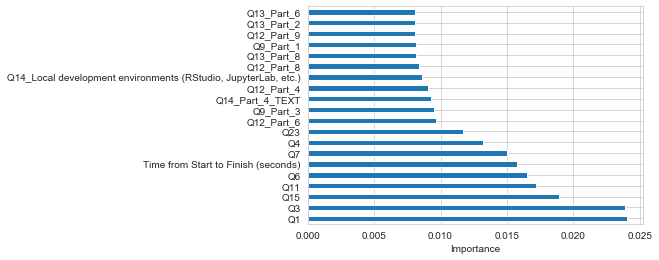

In [430]:
top=20
feat_importances = pd.Series(tree_sel.feature_importances_, index=X.columns)
feat_importances.nlargest(top).plot(kind='barh')
plt.xlabel('Importance')
plt.show()

In [431]:
top_cols=feat_importances.nlargest(top).index.values

In [432]:
print("Then the features that are most related to a survey respondent's yearly compensation are %s" % top_cols)

Then the features that are most related to a survey respondent's yearly compensation are ['Q1' 'Q3' 'Q15' 'Q11' 'Q6' 'Time from Start to Finish (seconds)' 'Q7'
 'Q4' 'Q23' 'Q12_Part_6' 'Q9_Part_3' 'Q14_Part_4_TEXT' 'Q12_Part_4'
 'Q14_Local development environments (RStudio, JupyterLab, etc.)'
 'Q12_Part_8' 'Q13_Part_8' 'Q9_Part_1' 'Q12_Part_9' 'Q13_Part_2'
 'Q13_Part_6']


## Feature selection

Explain how feature engineering is a useful tool in machine learning. Then select the features to be used for analysis either manually or through some feature selection algorithm (e.g. regularized regression).

Not all features need to be used; features can be removed or added as desired. If the resulting number of features is very high, dimensionality reduction can also be used (e.g. PCA). Use at least one feature selection technique – describe the technique and provide justification on why you selected that set of features.

### Importance of feature engineering and justification of technique used

Feature engineering is a process of extracting information from raw data to construct explanatory variables in order to train models based on the domain knowledge. With the tool of feature engineering, it is easier to extract the underly meanings of the data and reduce the effect of overfitting and help to simplify the model, which in turn saving cost and time. 

The technique used in the last section computing feature importance for feature selection is embedded method with ExtraTreesClassifier. By applying this model, it generated feature importance while fitting the classifier model. Here, ExtraTreesClassifier is selected not only because it provides more accurate and takes considerations of feature interaction, but also because several trees will be averaged in the algorithm resulting less prone to overfitting with less cost. 

### Visualization of correlation for top columns selected

In [433]:
corr_table=pd.concat([df[top_cols],df['Q10_Encoded']],axis=1)
corr=corr_table.corr()
corr.head()

,Q1,Q3,Q15,Q11,Q6,Time from Start to Finish (seconds),Q7,Q4,Q23,Q12_Part_6,...,Q14_Part_4_TEXT,Q12_Part_4,"Q14_Local development environments (RStudio, JupyterLab, etc.)",Q12_Part_8,Q13_Part_8,Q9_Part_1,Q12_Part_9,Q13_Part_2,Q13_Part_6,Q10_Encoded
Q1,1.000000,-0.073423,0.427918,0.139168,0.019146,0.016775,0.006588,0.085271,0.283256,-0.079695,...,-0.011275,-0.052206,-0.065224,-0.048053,-0.042540,-0.012371,0.105202,-0.011240,-0.044058,0.358614
Q3,-0.073423,1.000000,0.005364,0.083090,0.183507,-0.033846,0.151303,-0.030937,-0.014485,0.038903,...,-0.020117,0.035873,-0.043512,0.060586,0.057191,0.045629,-0.037987,0.001726,0.000449,0.117753
Q15,0.427918,0.005364,1.000000,0.237159,0.058536,-0.010836,0.130518,0.171964,0.597231,-0.094018,...,0.041628,-0.066025,0.021533,0.069407,-0.060214,0.155930,0.201681,0.065451,-0.074180,0.409013
Q11,0.139168,0.083090,0.237159,1.000000,0.181415,-0.000896,0.250674,0.052797,0.220715,-0.054564,...,0.013459,-0.038444,-0.031759,0.079090,0.002352,0.180840,0.082681,0.075274,-0.035135,0.363425
Q6,0.019146,0.183507,0.058536,0.181415,1.000000,-0.023935,0.506287,0.036927,0.046464,-0.002191,...,-0.013992,0.033138,-0.036074,0.046472,0.028804,0.080924,-0.028196,0.034018,-0.001889,0.171243


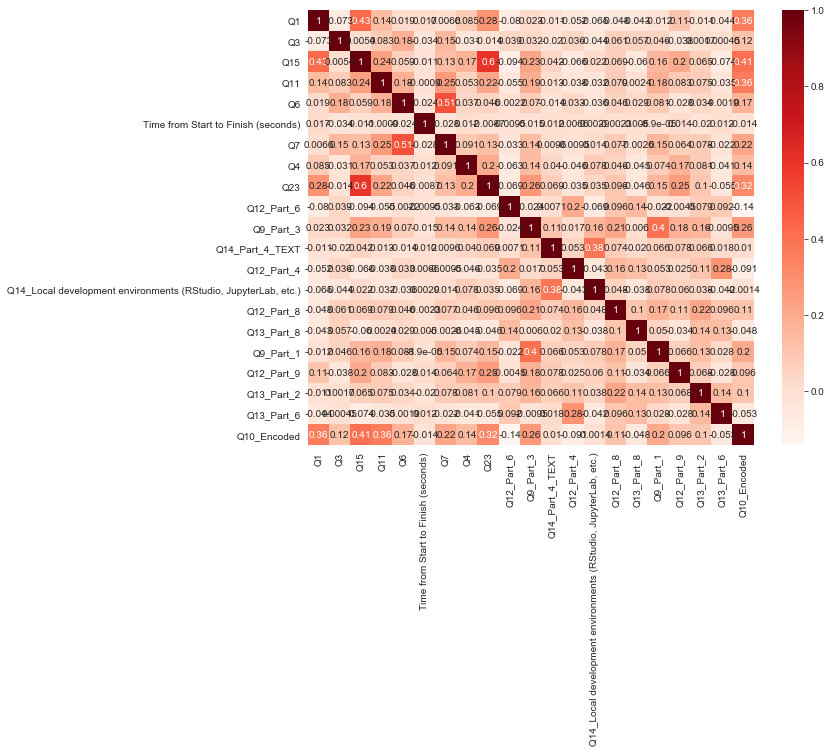

In [434]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [435]:
#sns.pairplot(corr_table)

Updated dataframe after feature selection:

In [436]:
X=X[top_cols]

## Model implementation

Implement logistic regression algorithm on the training data using 10-fold cross-validation. How does your model accuracy compare across the folds? What is average and variance of accuracy for folds? Treating each value of hyperparameter(s) as a new model, which model performed best? Give the reason based on bias-variance trade-off. An output of your algorithm should be a probability of belonging to each of the salary buckets. Apply scaling/normalization of features, if necessary.

### Spliting and Standarization of data

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [438]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create and fit a model

Since the target variable is ordinal, the default logistic regression model is not capable of taking consideration of ordering in the target variable. Therefore, new model with the function of ordinal classification should be built. In order to do, consecutive binary classification will be constructed. For each iteration, the target variables will be divided into class 0 and class 1. The original class 0 will remain 0, and class 1 to 14 will be turned into 1. For the second iteration, the original class 0 and 1 will be grouped into 0 and the rest would be 1. The class 0 and 1 will be updated for each iteration. Thus, for each iteration, default logistic regression model could perform binary classification. Then the probability of sample belonging to each class can be computed. At last, the class with the highest probability will be selected as prediction result. The corresponding code of this model is as following. 

In [439]:
def OrdinalLogistic(X_train,y_train,X_test,y_test,n_target=14,C=1,solver='lbfgs'):
    class0=[0]
    count=0    
    prob=[] 
    for i in range(n_target):
        y_train_c=[]
        #prob=list(range(n_target))
        for ix,target in enumerate(y_train):
            if target in class0:  
                y_train_c.append(0)
            else: 
                y_train_c.append(1)
        #print('For the {} iteration, class 0 contains {}'.format(count+1,class0))
        #print('The first 15 values of updated y_train is',y_train_c[:15])
        model = LogisticRegression(C=C,solver=solver)    
        model.fit(X_train, y_train_c)
        y_pred = model.predict(X_test)
        y_pred_prob=model.predict_proba(X_test)[:,0]
        prob.append(y_pred_prob)

        #print('Probability of class0 {} is {}{}'.format(class0,'\n',y_pred_prob))
        #print('The cumulative probibilty of is {}{}'.format('\n',prob))
        #print('Length---',len(prob))
        ###print("Accuracy is", accuracy_score(y_test, y_pred))
        #print('*'*80)
        count+=1
        class0.append(count)
    p_last=model.predict_proba(X_test)[:,1]
    prob_each_class=[]
    for i in range(n_target):
        if len(prob_each_class)==0:
            prob_each_class.append(prob[0])
        else:
            prob_each_class.append(prob[i]-prob[i-1])
    prob_each_class.append(p_last)
    prediction=np.argmax(prob_each_class,axis=0)
    #print(prediction)
    #print("Accuracy is", accuracy_score(y_test, prediction))
    return prediction

### Evaluation: Cross validation

In [440]:
#model = OrdinalLogistic(X_train=X,y_train=y,X_test,n_target=14)
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Use our own model instead default one.
    #model.fit(X_train, y_train)
    #predictions = model.predict(X_test)
    predictions=OrdinalLogistic(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test, n_target=14)

# For non-binary classification problem, confusion matrix is not 2X2.   
#     TN = confusion_matrix(y_test, predictions)[0][0]
#     FP = confusion_matrix(y_test, predictions)[0][1]
#     FN = confusion_matrix(y_test, predictions)[1][0]
#     TP = confusion_matrix(y_test, predictions)[1][1]
#     total = TN + FP + FN + TP
#     ACC = (TP + TN) / float(total)

    cm=confusion_matrix(y_test, predictions)
    correct=np.diag(cm).sum()
    ACC=correct/len(X_test)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.269%
Fold 2: Accuracy: 0.324%
Fold 3: Accuracy: 0.303%
Fold 4: Accuracy: 0.316%
Fold 5: Accuracy: 0.305%
Fold 6: Accuracy: 0.347%
Fold 7: Accuracy: 0.325%
Fold 8: Accuracy: 0.376%
Fold 9: Accuracy: 0.415%
Fold 10: Accuracy: 0.408%
Average Score: 33.874%(4.503%)


Clearly, the bias of this model is high whereas the variance is relatively high. 

## Model tuning

Improve the performance of the models from the previous step with hyperparameter tuning and select a final optimal model using grid search based on a metric (or metrics) that you choose. Choosing an optimal model for a given task (comparing multiple classifiers on a specific domain) requires selecting performance measures, for example accuracy, precision, recall and/or F1-score to compare the model performance.
There is no minimum model accuracy, as long as your methodology is reasonable and well explained.

### Hyperparameters tuning for Ordinal Logistic Regression Model constructed  

Grid search has been used tuning both "C" and "solver" for binary logistic classifier in each loop. Inside of each loop, the corresponding logistic regression model can be tuned. Then the best-tunned logistic regression model will be used to predict binary class with probability output for that loop. 

In [441]:
param_grid = { 
        "C": [0.001,0.01,0.05,0.1,0.5,1,5,10, 100],
        "solver" : ['newton-cg','lbfgs','liblinear','sag']
}

In [442]:
def OrdinalLogistic_tuning(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,n_target=14):
    class0=[0]
    count=0    
    prob=[] 
    for i in range(n_target):
        y_train_c=[]
        #prob=list(range(n_target))
        for ix,target in enumerate(y_train):
            if target in class0:  
                y_train_c.append(0)
            else: 
                y_train_c.append(1)
        #print('For the {} iteration, class 0 contains {}'.format(count+1,class0))
        #print('The first 15 values of updated y_train is',y_train_c[:15])
        model = LogisticRegression() 
        grid = GridSearchCV(model, param_grid, cv=10, return_train_score=False)
        grid.fit(X_train, y_train_c)
        #Use the best parameter to predict
        #print("For the scenario {} :".format(i+1))
        #print("Best score is ",grid.best_score_)
        #print("Best parameter is ",grid.best_params_)
        #print('*'*80)
        y_pred = grid.predict(X_test)
        y_pred_prob=grid.predict_proba(X_test)[:,0]
        prob.append(y_pred_prob)

        #print('Probability of class0 {} is {}{}'.format(class0,'\n',y_pred_prob))
        #print('The cumulative probibilty of is {}{}'.format('\n',prob))
        #print('Length---',len(prob))
        ###print("Accuracy is", accuracy_score(y_test, y_pred))
        #print('+'*80)
        count+=1
        class0.append(count)
    p_last=grid.predict_proba(X_test)[:,1]
    prob_each_class=[]
    for i in range(n_target):
        if len(prob_each_class)==0:
            prob_each_class.append(prob[0])
        else:
            prob_each_class.append(prob[i]-prob[i-1])
    prob_each_class.append(p_last)
    prediction=np.argmax(prob_each_class,axis=0)
    
    cm=confusion_matrix(y_test, prediction)
    correct=np.diag(cm).sum()
    ACC=correct/cm.sum().sum()
    
    accuracy = ACC*100
    print("Accuracy is {}%".format(accuracy))
    # print("Sklearn accuracy is", accuracy_score(y_test, prediction))
    return prediction

In [ ]:
y_pred=OrdinalLogistic_tuning(X_train,y_train,X_test,n_target=14)

After hyperparameter tuning, the accuracy of the model has increased to about 40%. 

### Comparison with other classification models 

Overall, the ordinal logistic regression model performs fairly good comparing other models. 

In [448]:
# X_train, X_test, y_train, y_test = train_test_split(X.iloc[0:500,:], y.iloc[0:500], random_state=42, test_size=0.3)
# scaler = StandardScaler()
# X_train= scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#### Decision tree

In [192]:
 def get_accuracy(y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    correct=np.diag(cm).sum()
    ACC=correct/cm.sum().sum()
    accuracy = ACC*100
    return accuracy 

In [193]:
Dct=DecisionTreeClassifier()
Dct_score=cross_val_score(Dct, X, y, cv=10)
print('The average of 10-fold cross validation score of Decision Tree is:{}'.format(np.average(Dct_score)))
print('The standard deviation of Decision Tree is:{}'.format(np.std(Dct_score)))

The average of 10-fold cross validation score of Decision Tree is:0.2413529340990149
The standard deviation of Decision Tree is:0.00963379693612128


In [194]:
param_grid = [{ 
        "max_depth" : [5,10, 20, 30,50],
        "max_features"  : ["sqrt", "log2", None],
        "min_samples_split":[2,5,10],
        "min_samples_leaf": [10,30,40,50,100]       
        }]
Dct_grid= GridSearchCV(Dct, param_grid)
Dct_grid.fit(X_train, y_train)
y_pred_Dct=Dct_grid.predict(X_test)
print('For Decision Tree model, best Parameters after tuning is {} with the prediction accuracy {}.'.format(Dct_grid.best_params_,get_accuracy(y_test,y_pred_Dct)))

For Decision Tree model, best Parameters after tuning is {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 100, 'min_samples_split': 2} with the prediction accuracy 34.586666666666666.


#### Random Forest

In [195]:
RF=RandomForestClassifier()
RF_score=cross_val_score(RF, X_train, y_train, cv=10)
print('The average of 10-fold cross validation score of Random Forest is:{}'.format(np.average(RF_score)))
print('The standard deviation of Random Forest is:{}'.format(np.std(RF_score)))  

The average of 10-fold cross validation score of Random Forest is:0.3218403002974631
The standard deviation of Random Forest is:0.008312011776830736


In [196]:
param_grid = [{ 
            'n_estimators' : [10,50,100],
            'max_depth': [10,50,100,None],
            'min_samples_leaf':[1,2,5]
        }]
RF_grid = GridSearchCV(RF, param_grid)
RF_grid.fit(X_train, y_train)
y_pred_RF=RF_grid.predict(X_test)
print('For Random Forest model, best Parameters after tuning is {} with the prediction accuracy {}.'.format(Dct_grid.best_params_,get_accuracy(y_test,y_pred_RF)))

For Random Forest model, best Parameters after tuning is {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 100, 'min_samples_split': 2} with the prediction accuracy 34.85333333333333.


#### Support Vector Machines

In [197]:
SVM=SVC()
SVM_score=cross_val_score(SVM, X_train, y_train, cv=10)
print('The average of 10-fold cross validation score of Support Vector Machines is:{}'.format(np.average(SVM_score)))
print('The standard deviation of Support Vector Machines is:{}'.format(np.std(SVM_score)))  

The average of 10-fold cross validation score of Support Vector Machines is:0.34194361242227045
The standard deviation of Support Vector Machines is:0.004349917321285919


In [198]:
param_grid = [{ 
        'C':[0.001,0.1,1,5,10]
        }]
SVM_grid = GridSearchCV(SVM, param_grid,cv=10)
SVM_grid.fit(X_train, y_train)
y_pred_SVM=SVM_grid.predict(X_test)
print('For Random Forest model, best Parameters after tuning is {} with the prediction accuracy {}.'.format(SVM_grid.best_params_,get_accuracy(y_test,y_pred_SVM)))

For Random Forest model, best Parameters after tuning is {'C': 1} with the best accuracy 33.54666666666667 during cross validation tunning.


#### Gradient Boosted Trees

In [358]:
GB=GradientBoostingClassifier()
GB_score=cross_val_score(GB, X_train, y_train, cv=5)
print('The average of 10-fold cross validation score of Gradient Boosted Trees is:{}'.format(np.average(GB_score)))
print('The standard deviation of Gradient Boosted Trees is:{}'.format(np.std(GB_score)))  

The average of 10-fold cross validation score of Gradient Boosted Trees is:0.25578233143396123
The standard deviation of Gradient Boosted Trees is:0.022389645908106673


In [359]:
param_grid = [{ 
#        'learning_rate': [0.001,0.01,0.1,1,10],
        "n_estimators" : [100, 150, 200]
        }]
GB_grid = GridSearchCV(GB, param_grid)
GB_grid.fit(X_train, y_train)
y_pred_GB=GB_grid.predict(X_test)
print('For Random Forest model, best Parameters after tuning is {} with the prediction accuracy {}.'.format(GB_grid.best_params_,get_accuracy(y_test,y_pred_GB)))

For Random Forest model, best Parameters after tuning is {'n_estimators': 150} with the prediction accuracy 28.000000000000004.


## Testing & Discussion

Use your optimal model to make classifications on the test set. How does your model perform on the test set vs. the training set? The overall fit of the model, how to increase the accuracy (test, training)? Is it overfitting or underfitting? Why? Plot the distribution.
Insufficient discussion will lead to the deduction on marks.

High bias is obtained for current model. So current model is underfitting. From the error plot and accuracy, it is shown that in the beginning, both training and testing errors are huge with low degree model. As increasing the complexity of the model to about 2 degree, the training error drops while tesing error continues increasing. Eventually, training error decreases till the model is overfitting. Overall, the current ordinal logistic regression model is underfitting which did not learn well the underline function from features. In order to increase accuracy, possible solutions are adding polynomial features, getting additional features, decreasing penalty etc. 

### Train model with varying polynomial data and plot error plot 

In [449]:
def OrdinalLogistic_tuning(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,n_target=14):
    class0=[0]
    count=0    
    prob=[] 
    for i in range(n_target):
        y_train_c=[]
        #prob=list(range(n_target))
        for ix,target in enumerate(y_train):
            if target in class0:  
                y_train_c.append(0)
            else: 
                y_train_c.append(1)
        #print('For the {} iteration, class 0 contains {}'.format(count+1,class0))
        #print('The first 15 values of updated y_train is',y_train_c[:15])
        model = LogisticRegression() 
        grid = GridSearchCV(model, param_grid, cv=2, return_train_score=False)
        grid.fit(X_train, y_train_c)
        #Use the best parameter to predict
        #print("For the scenario {} :".format(i+1))
        #print("Best score is ",grid.best_score_)
        #print("Best parameter is ",grid.best_params_)
        #print('*'*80)
        y_pred = grid.predict(X_test)
        y_pred_prob=grid.predict_proba(X_test)[:,0]
        prob.append(y_pred_prob)

        #print('Probability of class0 {} is {}{}'.format(class0,'\n',y_pred_prob))
        #print('The cumulative probibilty of is {}{}'.format('\n',prob))
        #print('Length---',len(prob))
        ###print("Accuracy is", accuracy_score(y_test, y_pred))
        #print('+'*80)
        count+=1
        class0.append(count)
    p_last=grid.predict_proba(X_test)[:,1]
    prob_each_class=[]
    for i in range(n_target):
        if len(prob_each_class)==0:
            prob_each_class.append(prob[0])
        else:
            prob_each_class.append(prob[i]-prob[i-1])
    prob_each_class.append(p_last)
    prediction=np.argmax(prob_each_class,axis=0)
    
    cm=confusion_matrix(y_test, prediction)
    correct=np.diag(cm).sum()
    ACC=correct/cm.sum().sum()
    
    accuracy = ACC*100
    print("Accuracy is {}%".format(accuracy))
    # print("Sklearn accuracy is", accuracy_score(y_test, prediction))
    return prediction

In [453]:
steps = np.arange(1,4,1)

trainErr = np.zeros(steps.shape)
testErr = np.zeros(steps.shape)

for i, step in enumerate(steps):
    # Generate polynomial features
    poly = PolynomialFeatures(step, interaction_only=True)
    pX_train = poly.fit_transform(X_train)
    pX_test = poly.transform(X_test)
    
    # Rescale the features with mean = 0, std = 1 for numerical stability
    scaler = StandardScaler()
    pX_train = scaler.fit_transform(pX_train)
    pX_test = scaler.transform(pX_test)
        
    # Train model and Make Predictions    
    y_train_pred = OrdinalLogistic_tuning(X_train=pX_train,y_train=y_train,X_test=pX_train,y_test=y_train)
    y_test_pred = OrdinalLogistic_tuning(X_train=pX_train,y_train=y_train,X_test=pX_test,y_test=y_test)
    
    # Calculate Error
    trainErr[i] = mean_squared_error(y_train, y_train_pred)
    testErr[i] = mean_squared_error(y_test, y_test_pred)

Accuracy is 21.714285714285715%
Accuracy is 23.333333333333332%
Accuracy is 69.71428571428572%
Accuracy is 19.333333333333332%
Accuracy is 67.71428571428572%
Accuracy is 14.000000000000002%


No handles with labels found to put in legend.


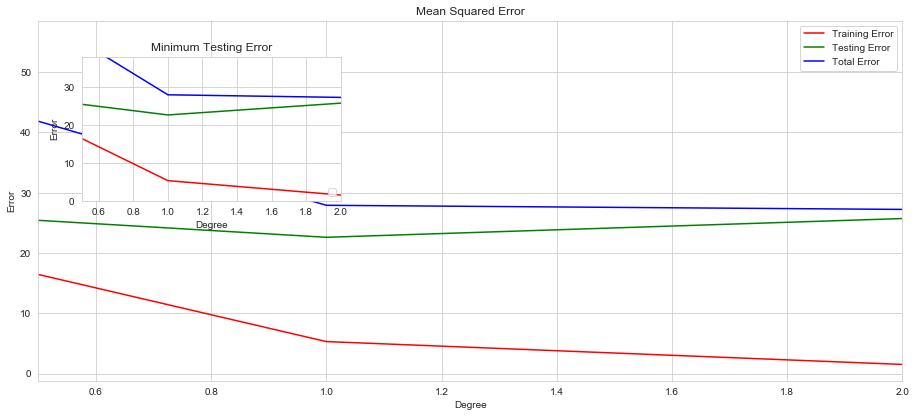

In [455]:
fig = plt.figure(figsize=(12,5))

totalErr = trainErr + testErr

axes1 = fig.add_axes([0, 0, 1, 1]) # main axes
axes2 = fig.add_axes([0.05, .5, .3, .4]) # inner axes

axes1.plot(trainErr,'r',label='Training Error')
axes1.plot(testErr,'g',label='Testing Error')
axes1.plot(totalErr, 'b', label='Total Error')

axes1.set_title("Mean Squared Error")
axes1.set_xlabel("Degree")
axes1.set_ylabel("Error")
axes1.set_xlim(0.5,steps[-2])
axes1.legend(loc=1)

axes2.plot(trainErr,'r')
axes2.plot(testErr,'g')
axes2.plot(totalErr,'b')
axes2.set_xlim(0.5,steps[-2])
axes2.set_ylim(0, totalErr[1]+10)
axes2.set_title("Minimum Testing Error")
axes2.set_xlabel("Degree")
axes2.set_ylabel("Error")

plt.legend(loc=4)

(1, 2)

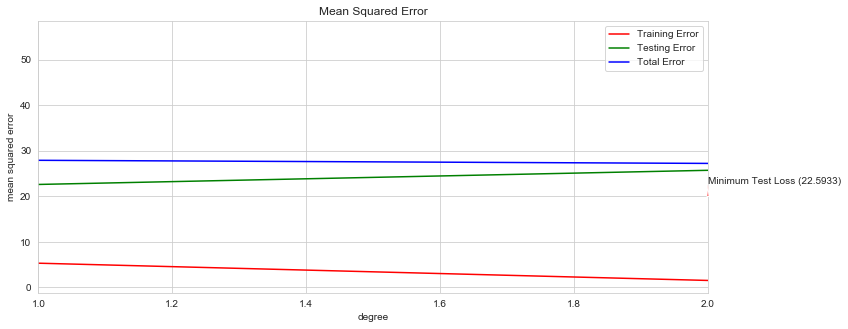

In [454]:
plt.figure(figsize=(12,5))


plt.plot(trainErr,'r',label='Training Error')
plt.plot(testErr,'g',label='Testing Error')
plt.plot(trainErr + testErr, 'b', label='Total Error')

test_loss_min = testErr.min()
deg_min = testErr.argmin() + steps[0]

#Annotate the plot:plt.annotate(text,pointing coordinates,text coordinates,arrowproperty={})
plt.annotate('Minimum Test Loss (%.4f)' % test_loss_min,xy=(deg_min,test_loss_min),xytext=(deg_min,test_loss_min+0.08),arrowprops=dict(width=1,headwidth=2,facecolor='r',shrink=0.05))

plt.title("Mean Squared Error")
plt.xlabel("degree")
plt.ylabel("mean squared error")
plt.legend(loc=1)
plt.xlim(1,steps[-2])

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

### Computer R2 socre for overall fitting performance3

In [ ]:
# y_pred=OrdinalLogistic_tuning(X_train,y_train,X_test,y_test,n_target=14)
# print('R2 score----',r2_score(y_test, y_pred))